In [1]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import files

# Set visual style
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (12, 6)
%matplotlib inline

In [2]:
# Upload Your Dataset
uploaded = files.upload()
file_name = next(iter(uploaded))
df = pd.read_csv(file_name)

Saving protein sequence.csv to protein sequence.csv


In [3]:
print(f" Dataset loaded: {file_name}")
print(f"Shape: {df.shape} rows, columns")

print("\n First 5 rows:")
display(df.head())

print("\n Dataset Info:")
df.info()

print("\n Basic Statistics:")
display(df.describe(include='all'))

 Dataset loaded: protein sequence.csv
Shape: (467304, 6) rows, columns

 First 5 rows:


,structureId,chainId,sequence,residueCount,macromoleculeType,seqLength
0,100D,A,CCGGCGCCGG,10.0,DNA/RNA Hybrid,10
1,100D,B,CCGGCGCCGG,10.0,DNA/RNA Hybrid,10
2,101D,A,CGCGAATTCGCG,12.0,DNA,12
3,101D,B,CGCGAATTCGCG,12.0,DNA,12
4,101M,A,MVLSEGEWQLVLHVWAKVEADVAGHGQDILIRLFKSHPETLEKFDR...,154.0,Protein,154



 Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 467304 entries, 0 to 467303
Data columns (total 6 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   structureId        467304 non-null  object 
 1   chainId            467304 non-null  object 
 2   sequence           467304 non-null  object 
 3   residueCount       467304 non-null  float64
 4   macromoleculeType  467304 non-null  object 
 5   seqLength          467304 non-null  int64  
dtypes: float64(1), int64(1), object(4)
memory usage: 21.4+ MB

 Basic Statistics:


,structureId,chainId,sequence,residueCount,macromoleculeType,seqLength
count,467304,467304,467304,467304.000000,467304,467304.000000
unique,140250,2837,104813,NaN,13,NaN
top,3J3Q,A,PIVQNLQGQMVHQAISPRTLNAWVKVVEEKAFSPEVIPMFSALSEG...,NaN,Protein,NaN
freq,1356,135187,5112,NaN,379997,NaN
mean,NaN,NaN,NaN,247.680780,NaN,247.682004
std,NaN,NaN,NaN,261.687369,NaN,261.687476
min,NaN,NaN,NaN,1.000000,NaN,1.000000
25%,NaN,NaN,NaN,112.000000,NaN,112.000000
50%,NaN,NaN,NaN,203.000000,NaN,203.000000
75%,NaN,NaN,NaN,316.000000,NaN,316.000000


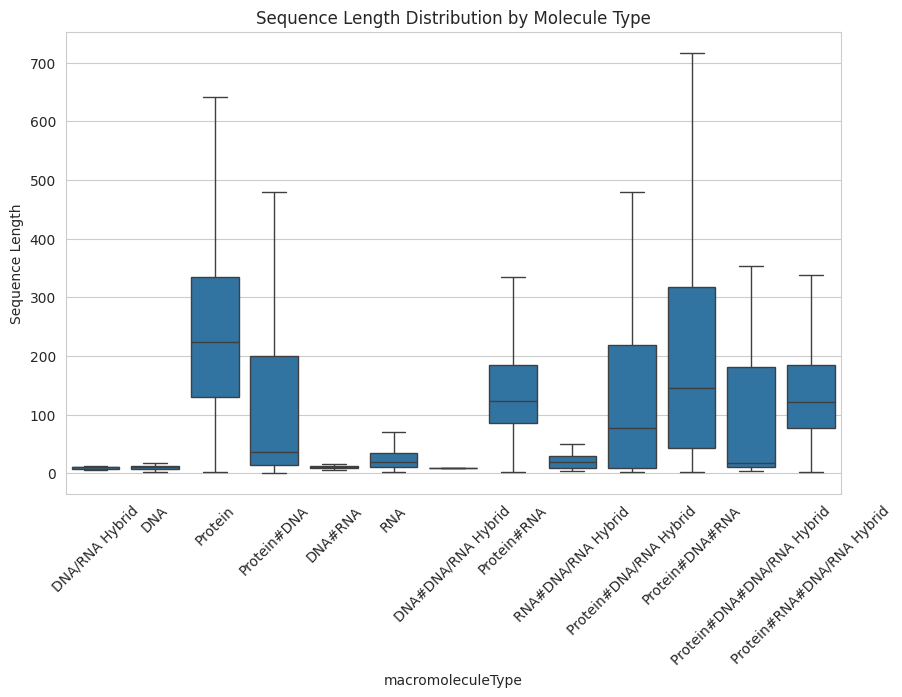

In [4]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='macromoleculeType', y='seqLength',
            showfliers=False)
plt.xticks(rotation=45)
plt.title("Sequence Length Distribution by Molecule Type")
plt.ylabel("Sequence Length")
plt.show()

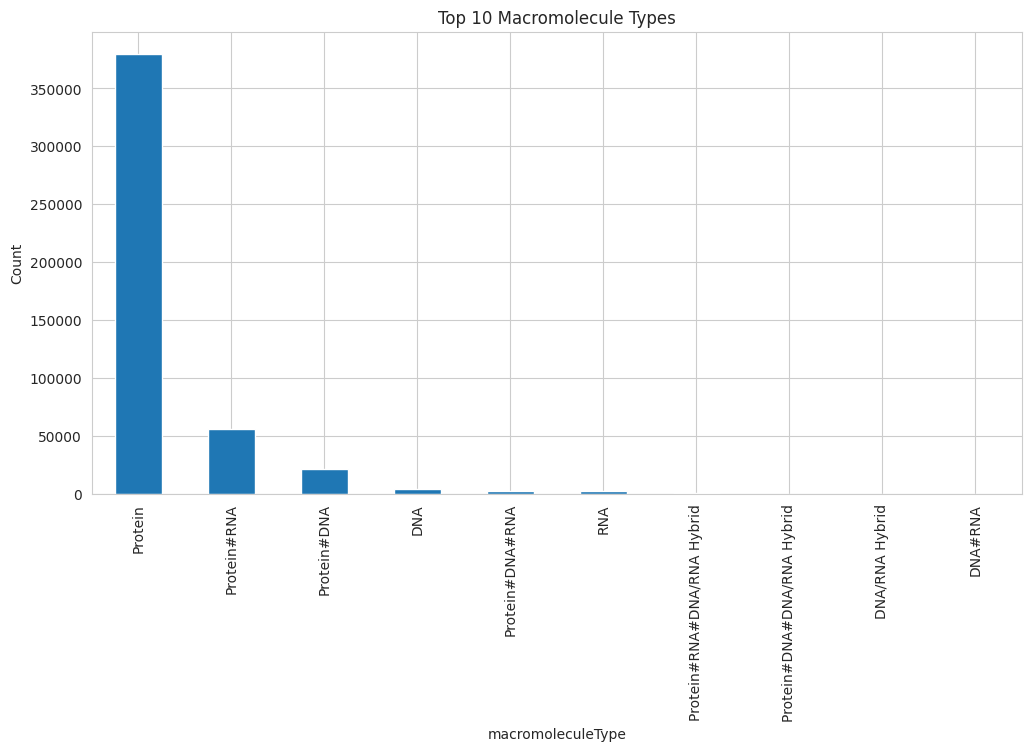

In [5]:
top_molecules = df['macromoleculeType'].value_counts().head(10)
top_molecules.plot(kind='bar')
plt.title("Top 10 Macromolecule Types")
plt.ylabel("Count")
plt.show()

Longest sequence: 5070 residues


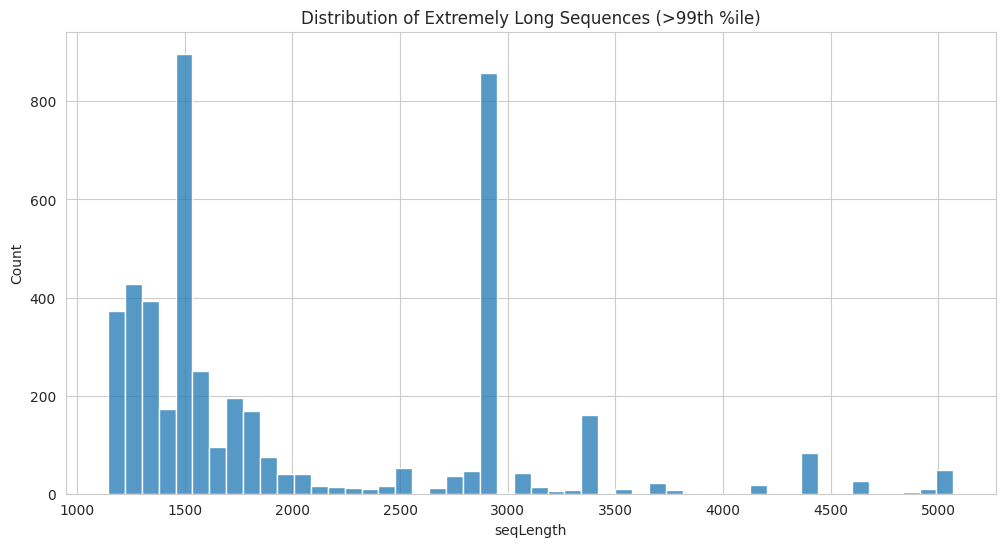

In [6]:
long_sequences = df[df['seqLength'] > df['seqLength'].quantile(0.99)]
print(f"Longest sequence: {long_sequences['seqLength'].max()} residues")
sns.histplot(long_sequences['seqLength'], bins=50)
plt.title("Distribution of Extremely Long Sequences (>99th %ile)")
plt.show()


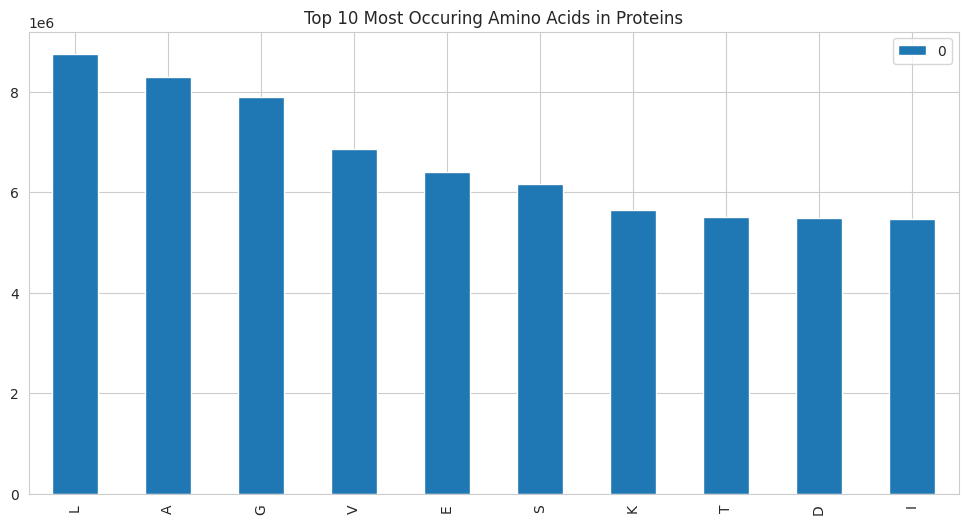

In [8]:
from collections import Counter

protein_df = df[df['macromoleculeType'] == 'Protein']
aa_counts = Counter(''.join(protein_df['sequence'].str.upper()))
pd.DataFrame.from_dict(aa_counts, orient='index').sort_values(0, ascending=False).head(10).plot(kind='bar')
plt.title("Top 10 Most Occuring Amino Acids in Proteins")
plt.show()


In [9]:
print(f"Unique chains: {df['chainId'].nunique()}")
print(f"Most common chain: {df['chainId'].mode()[0]} (appears {df['chainId'].value_counts().max()} times)")


Unique chains: 2837
Most common chain: A (appears 135187 times)
